<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [5]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.592515,57.198523,43.824267,373.522698,562.138003,132.352929,429.785073
1,0.0,1.0,63.333196,24.770572,86.375405,108.097683,292.576855,325.614148,-33.037293
2,0.0,2.0,70.901195,43.876381,31.870698,266.013588,422.661861,107.297994,315.363867
3,0.0,3.0,37.059843,37.405318,49.839215,-59.812671,74.491705,-18.289747,92.781452
4,0.0,4.0,88.095208,72.413083,59.029523,71.093495,300.631307,184.300559,116.330748
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,25.392341,90.605993,47.347964,-285.436737,-112.090439,-215.819770,103.729330
29996,999.0,26.0,34.436874,41.898034,76.737745,15.393000,178.465653,92.701986,85.763667
29997,999.0,27.0,60.221987,41.828521,44.982019,-123.990673,33.041854,114.233344,-81.191490
29998,999.0,28.0,74.755298,45.451357,27.743215,-403.177899,-245.228029,104.177735,-349.405764


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.592515,57.198523,43.824267,373.522698,562.138003,132.352929,429.785073
1,0.0,1.0,63.333196,24.770572,86.375405,108.097683,292.576855,325.614148,-33.037293
2,0.0,2.0,70.901195,43.876381,31.870698,266.013588,422.661861,107.297994,315.363867
3,0.0,3.0,37.059843,37.405318,49.839215,-59.812671,74.491705,-18.289747,92.781452
4,0.0,4.0,88.095208,72.413083,59.029523,71.093495,300.631307,184.300559,116.330748
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,25.392341,90.605993,47.347964,-285.436737,-112.090439,-215.819770,103.729330
29996,999.0,26.0,34.436874,41.898034,76.737745,15.393000,178.465653,92.701986,85.763667
29997,999.0,27.0,60.221987,41.828521,44.982019,-123.990673,33.041854,114.233344,-81.191490
29998,999.0,28.0,74.755298,45.451357,27.743215,-403.177899,-245.228029,104.177735,-349.405764


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    77.592515  57.198523  ...  132.352929  429.785073
      1.0    63.333196  24.770572  ...  325.614148  -33.037293
      2.0    70.901195  43.876381  ...  107.297994  315.363867
      3.0    37.059843  37.405318  ...  -18.289747   92.781452
      4.0    88.095208  72.413083  ...  184.300559  116.330748
...                ...        ...  ...         ...         ...
999.0 25.0   25.392341  90.605993  ... -215.819770  103.729330
      26.0   34.436874  41.898034  ...   92.701986   85.763667
      27.0   60.221987  41.828521  ...  114.233344  -81.191490
      28.0   74.755298  45.451357  ...  104.177735 -349.405764
      29.0   62.298176  62.627018  ...   -9.849538   15.713677

[30000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    77.592515  57.198523  ...  132.352929  429.785073
      1.0    63.333196  24.770572  ...  325.614148  -33.037293
      2.0    70.901195  43.876381  ...  107.297994  315.363867
      3.0    37.059843  37.405318  ...  -18.289747   92.781452
      4.0    88.095208  72.413083  ...  184.300559  116.330748
...                ...        ...  ...         ...         ...
999.0 25.0   25.392341  90.605993  ... -215.819770  103.729330
      26.0   34.436874  41.898034  ...   92.701986   85.763667
      27.0   60.221987  41.828521  ...  114.233344  -81.191490
      28.0   74.755298  45.451357  ...  104.177735 -349.405764
      29.0   62.298176  62.627018  ...   -9.849538   15.713677

[30000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.592515,57.198523,43.824267,373.522698,562.138003,132.352929,429.785073
1,0.0,1.0,63.333196,24.770572,86.375405,108.097683,292.576855,325.614148,-33.037293
2,0.0,2.0,70.901195,43.876381,31.870698,266.013588,422.661861,107.297994,315.363867
3,0.0,3.0,37.059843,37.405318,49.839215,-59.812671,74.491705,-18.289747,92.781452
4,0.0,4.0,88.095208,72.413083,59.029523,71.093495,300.631307,184.300559,116.330748
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,25.392341,90.605993,47.347964,-285.436737,-112.090439,-215.819770,103.729330
29996,999.0,26.0,34.436874,41.898034,76.737745,15.393000,178.465653,92.701986,85.763667
29997,999.0,27.0,60.221987,41.828521,44.982019,-123.990673,33.041854,114.233344,-81.191490
29998,999.0,28.0,74.755298,45.451357,27.743215,-403.177899,-245.228029,104.177735,-349.405764


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    77.592515  57.198523  ...  132.352929  429.785073
      1.0    63.333196  24.770572  ...  325.614148  -33.037293
      2.0    70.901195  43.876381  ...  107.297994  315.363867
      3.0    37.059843  37.405318  ...  -18.289747   92.781452
      4.0    88.095208  72.413083  ...  184.300559  116.330748
...                ...        ...  ...         ...         ...
999.0 25.0   25.392341  90.605993  ... -215.819770  103.729330
      26.0   34.436874  41.898034  ...   92.701986   85.763667
      27.0   60.221987  41.828521  ...  114.233344  -81.191490
      28.0   74.755298  45.451357  ...  104.177735 -349.405764
      29.0   62.298176  62.627018  ...   -9.849538   15.713677

[30000 rows x 7 columns]

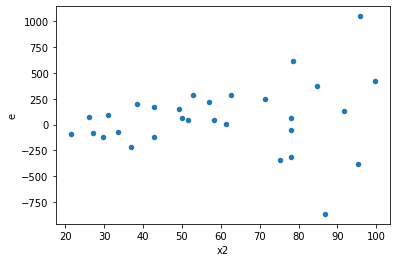

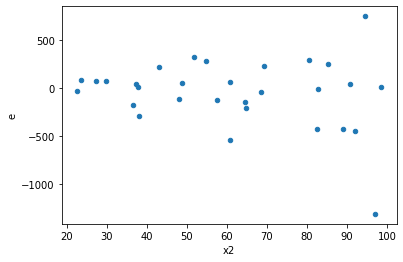

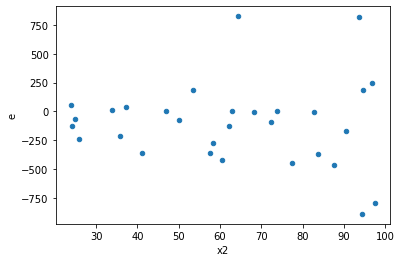

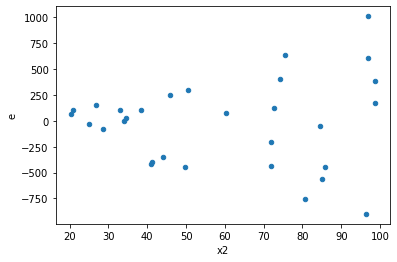

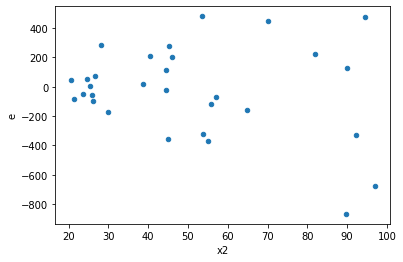

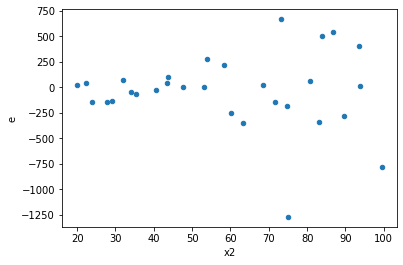

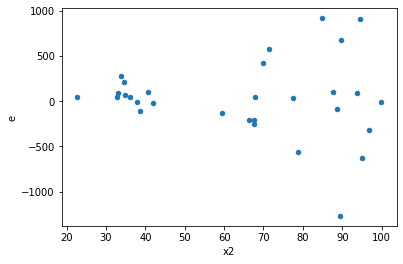

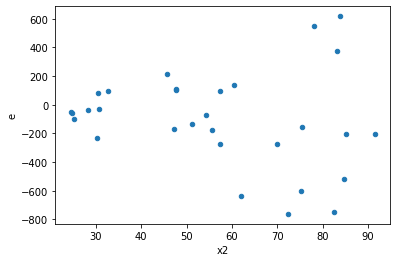

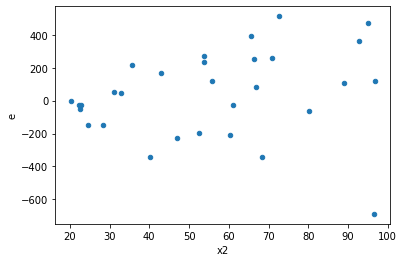

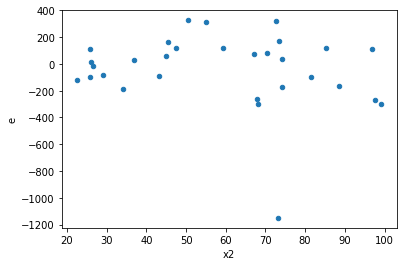

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,115539.43682042682,1997018.9912883951,12837.715202269646,221890.9990320439,17.284306088424103,0.00023618524335988766,0.9998819073783201,0.00011809262167994383,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,327707.4238692047,2267086.916055153,36411.93598546719,251898.54622835034,6.918021231523878,0.008191401869462878,0.9959042990652686,0.004095700934731439,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,107192.93501654353,1327936.5914852167,11910.326112949282,147548.51016502408,12.38828465029221,0.0009040925553354118,0.9995479537223323,0.0004520462776677059,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,188705.93773778944,1075135.8326881754,20967.326415309937,119459.53696535282,5.697413900044298,0.01616921856286102,0.9919153907185695,0.00808460928143051,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,242287.91186826554,1288979.2988579483,26920.87909647395,143219.92209532758,5.320031399497882,0.02039541872056394,0.989802290639718,0.01019770936028197,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,296684.44102116657,2626961.670965856,32964.93789124073,291884.63010731735,8.854396482417625,0.0033074964929014072,0.9983462517535493,0.0016537482464507036,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,246702.52124879337,1355328.323508277,27411.39124986593,150592.03594536413,5.493775728953585,0.018301176552530052,0.990849411723735,0.009150588276265026,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,349010.5141331095,4470936.105905018,38778.946014789944,496770.67843389086,12.810319244995132,0.0007917008417175353,0.9996041495791412,0.00039585042085876765,Reject005=0 : Heteroscedasticity
9.0,9.0,9.0,258559.49360823267,5150359.587387852,28728.832623136965,572262.176376428,19.919437169039465,0.00013153421186640202,0.9999342328940668,6.576710593320101e-05,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,115539.43682042682,1997018.9912883951,12837.715202269646,221890.9990320439,17.284306088424103,0.00023618524335988766,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,327707.4238692047,2267086.916055153,36411.93598546719,251898.54622835034,6.918021231523878,0.008191401869462878,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,107192.93501654353,1327936.5914852167,11910.326112949282,147548.51016502408,12.38828465029221,0.0009040925553354118,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,188705.93773778944,1075135.8326881754,20967.326415309937,119459.53696535282,5.697413900044298,0.01616921856286102,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,242287.91186826554,1288979.2988579483,26920.87909647395,143219.92209532758,5.320031399497882,0.02039541872056394,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,296684.44102116657,2626961.670965856,32964.93789124073,291884.63010731735,8.854396482417625,0.0033074964929014072,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,246702.52124879337,1355328.323508277,27411.39124986593,150592.03594536413,5.493775728953585,0.018301176552530052,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,349010.5141331095,4470936.105905018,38778.946014789944,496770.67843389086,12.810319244995132,0.0007917008417175353,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,708672.8389408767,554085.7106889719,78741.42654898629,61565.078965441324,0.7818639014260266,0.7199078908736471,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    833
Reject005=1 : Homoscedasticity      167
Name: Result_test, dtype: int64